In [1]:
import numpy as np 
import math
from matplotlib import pyplot as plt
from functools import partial




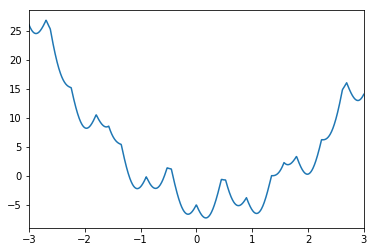

In [2]:
f = lambda x: -(abs(6*np.cos(3*x)) + abs(3*np.sin(7*x)) - 3*x*x + 2*x -1)
xs = np.linspace(-3.,3.,1000)
plt.plot(xs, f(xs))
plt.xlim(-3,3)
plt.show()

In [3]:

pfxs = lambda s, x: x + s*np.random.normal()
pfxs(0.1, 1)


0.911302311133186

In [4]:


pf = partial(pfxs, 0.1)
pf(1)
tf = lambda t: 0.9*t #temperature function
itf = lambda length: math.ceil(1.2*length) #iteration function


In [5]:

def sa(energyfunc, initials, epochs, tempfunc, iterfunc, proposalfunc):
    accumulator=[]
    best_solution = old_solution = initials['solution']
    T=initials['T']
    length=initials['length']
    best_energy = old_energy = energyfunc(old_solution)
    accepted=0
    total=0
    for index in range(epochs):
        print("Epoch", index)
        if index > 0:
            T = tempfunc(T)
            length=iterfunc(length)
        print("Temperature", T, "Length", length)
        for it in range(int(length)):
            total+=1
            new_solution = proposalfunc(old_solution)
            new_energy = energyfunc(new_solution)
            # Use a min here as you could get a "probability" > 1
            alpha = min(1, np.exp((old_energy - new_energy)/T))
            if ((new_energy < old_energy) or (np.random.uniform() < alpha)):
                # Accept proposed solution
                accepted+=1
                accumulator.append((T, new_solution, new_energy))
                if new_energy < best_energy:
                    # Replace previous best with this one
                    best_energy = new_energy
                    best_solution = new_solution
                    best_index=total
                    best_temp=T
                old_energy = new_energy
                old_solution = new_solution
            else:
                # Keep the old stuff
                accumulator.append((T, old_solution, old_energy))
    
    best_meta=dict(index=best_index, temp=best_temp)
    print("frac accepted", accepted/total, "total iterations", total, 'bmeta', best_meta)
    return best_meta, best_solution, -best_energy, accumulator


In [7]:
inits=dict(solution=1, length=100, T=200)
bmeta, bs, be, out = sa(f, inits, 30, tf, itf, pf)

('Epoch', 0)
('Temperature', 200, 'Length', 100)
('Epoch', 1)
('Temperature', 180.0, 'Length', 120.0)
('Epoch', 2)
('Temperature', 162.0, 'Length', 144.0)
('Epoch', 3)
('Temperature', 145.8, 'Length', 173.0)
('Epoch', 4)
('Temperature', 131.22000000000003, 'Length', 208.0)
('Epoch', 5)
('Temperature', 118.09800000000003, 'Length', 250.0)
('Epoch', 6)
('Temperature', 106.28820000000003, 'Length', 300.0)
('Epoch', 7)
('Temperature', 95.65938000000003, 'Length', 360.0)
('Epoch', 8)
('Temperature', 86.09344200000002, 'Length', 432.0)
('Epoch', 9)
('Temperature', 77.48409780000003, 'Length', 519.0)
('Epoch', 10)
('Temperature', 69.73568802000003, 'Length', 623.0)
('Epoch', 11)
('Temperature', 62.762119218000024, 'Length', 748.0)
('Epoch', 12)
('Temperature', 56.485907296200025, 'Length', 898.0)
('Epoch', 13)
('Temperature', 50.83731656658002, 'Length', 1078.0)
('Epoch', 14)
('Temperature', 45.75358490992202, 'Length', 1294.0)
('Epoch', 15)
('Temperature', 41.17822641892982, 'Length', 1553.0

In [8]:
bs, be

(0.17003042947131036, 7.274873788845184)